In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [2]:
df_nasabah = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data\AI_Collection_and_Loss_Reverse_Forecast.csv", delimiter=";")
df_nasabah.head(5)

,debtor_name,debtor_nik,debtor_address,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_number,debtor_occupation,...,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12,aging,credit_risk,loss_reverse
0,Cemplunk Zulaika,"4,13343E+15","Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...",12188,6,10,"Bengkulu, 23-09-1997",26,+62 (102) 776 3467,Pengusaha,...,0,0,0,0,0,0,0,DPK,Tertagih dengan resiko rendah,0
1,"Clara Padmasari, M.Pd","7,87362E+15","Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...",56126,20,20,"Jawa Tengah, 13-04-1964",59,+62 (808) 299 5117,Pengusaha,...,0,0,0,0,0,1,0,DPK,Tertagih dengan resiko rendah,17708333
2,"Puti Cinthia Oktaviani, S.IP","9,93737E+15","Jl. Wonoayu No. 68\nSemarang, Riau 98101",98101,2,15,"Jawa Tengah, 01-09-1981",42,+62 (0582) 416 0892,Buruh,...,0,0,0,0,0,0,0,Lancar,Tertagih dengan resiko rendah,0
3,"Lalita Astuti, M.TI.","2,07108E+15","Gg. Sentot Alibasa No. 781\nPontianak, SU 76993",76993,19,16,"Aceh, 14-02-1987",36,+62 (737) 295-9765,Pengusaha,...,0,0,1,0,0,0,0,DPK,Tertagih dengan resiko rendah,15291667
4,Daliman Kusumo,"8,85274E+15","Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297",6297,1,1,"Gorontalo, 06-12-1998",25,+62 (0740) 390 0826,Pegawai Swasta,...,0,0,0,0,0,0,0,DPK,Tertagih dengan resiko rendah,0


In [3]:
df_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   debtor_name             5000 non-null   object
 1   debtor_nik              5000 non-null   object
 2   debtor_address          5000 non-null   object
 3   debtor_zip              5000 non-null   int64 
 4   debtor_rt               5000 non-null   int64 
 5   debtor_rw               5000 non-null   int64 
 6   debtor_birth_place      5000 non-null   object
 7   debtor_age              5000 non-null   int64 
 8   debtor_number           5000 non-null   object
 9   debtor_occupation       5000 non-null   object
 10  debtor_marital_status   5000 non-null   object
 11  debtor_company          5000 non-null   object
 12  debtor_gender           5000 non-null   object
 13  debtor_education_level  5000 non-null   object
 14  employment_type         5000 non-null   object
 15  numb

In [4]:
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "object":
        df_nasabah[i] = df_nasabah[i].astype("category")

In [5]:
df_nasabah.head(5)

,debtor_name,debtor_nik,debtor_address,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_number,debtor_occupation,...,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12,aging,credit_risk,loss_reverse
0,Cemplunk Zulaika,"4,13343E+15","Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...",12188,6,10,"Bengkulu, 23-09-1997",26,+62 (102) 776 3467,Pengusaha,...,0,0,0,0,0,0,0,DPK,Tertagih dengan resiko rendah,0
1,"Clara Padmasari, M.Pd","7,87362E+15","Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...",56126,20,20,"Jawa Tengah, 13-04-1964",59,+62 (808) 299 5117,Pengusaha,...,0,0,0,0,0,1,0,DPK,Tertagih dengan resiko rendah,17708333
2,"Puti Cinthia Oktaviani, S.IP","9,93737E+15","Jl. Wonoayu No. 68\nSemarang, Riau 98101",98101,2,15,"Jawa Tengah, 01-09-1981",42,+62 (0582) 416 0892,Buruh,...,0,0,0,0,0,0,0,Lancar,Tertagih dengan resiko rendah,0
3,"Lalita Astuti, M.TI.","2,07108E+15","Gg. Sentot Alibasa No. 781\nPontianak, SU 76993",76993,19,16,"Aceh, 14-02-1987",36,+62 (737) 295-9765,Pengusaha,...,0,0,1,0,0,0,0,DPK,Tertagih dengan resiko rendah,15291667
4,Daliman Kusumo,"8,85274E+15","Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297",6297,1,1,"Gorontalo, 06-12-1998",25,+62 (0740) 390 0826,Pegawai Swasta,...,0,0,0,0,0,0,0,DPK,Tertagih dengan resiko rendah,0


In [6]:
df_nasabah.isnull().sum()

debtor_name               0
debtor_nik                0
debtor_address            0
debtor_zip                0
debtor_rt                 0
debtor_rw                 0
debtor_birth_place        0
debtor_age                0
debtor_number             0
debtor_occupation         0
debtor_marital_status     0
debtor_company            0
debtor_gender             0
debtor_education_level    0
employment_type           0
number_of_dependents      0
net_income                0
payment_date              0
loan_amount               0
tenor                     0
amount_of_late            0
late_payment_amount       0
credit_score              0
arrears_amounts           0
aset                      0
bil1_late1                0
bill_late2                0
bill_late3                0
bill_late4                0
bill_late5                0
bill_late6                0
bill_late7                0
bill_late8                0
bill_late9                0
bill_late10               0
bill_late11         

In [7]:
df_nasabah.dropna(inplace=True)

In [8]:
df_nasabah.duplicated().sum()

0

In [9]:
df_nasabah.describe(include="number")

,debtor_zip,debtor_rt,debtor_rw,debtor_age,number_of_dependents,net_income,loan_amount,tenor,amount_of_late,late_payment_amount,...,arrears4,arrears5,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12,loss_reverse
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,50191.166600,10.66060,10.575400,43.127400,3.086000,1.598885e+07,6.559770e+07,12.110800,69.656600,4.494400,...,0.272200,0.285000,0.263000,0.277800,0.271400,0.252000,0.259600,0.274800,0.263800,2.134013e+07
std,28833.170041,5.75288,5.811185,11.795279,1.340509,5.932670e+06,2.405757e+07,7.595266,47.851364,2.839785,...,0.608754,0.643007,0.630484,0.636167,0.640487,0.592762,0.599566,0.630686,0.629197,1.821149e+07
min,64.000000,1.00000,1.000000,23.000000,0.000000,2.000000e+05,1.250000e+07,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,24582.750000,6.00000,6.000000,33.000000,2.000000,1.150000e+07,5.633333e+07,6.000000,30.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.358333e+07
50%,51219.000000,11.00000,11.000000,43.000000,3.000000,1.550000e+07,6.050000e+07,11.000000,62.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.562500e+07
75%,74775.250000,16.00000,16.000000,53.000000,4.000000,1.900000e+07,6.683333e+07,17.000000,105.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.041667e+07
max,99979.000000,20.00000,20.000000,63.000000,7.000000,3.600000e+07,1.716667e+08,35.000000,246.000000,12.000000,...,4.000000,5.000000,6.000000,7.000000,8.000000,5.000000,5.000000,5.000000,6.000000,1.785417e+08


In [10]:
# Drop unnamed column
df_nasabah.drop([
                 "bil1_late1", "bill_late2", "bill_late3", "bill_late4", "bill_late5", "bill_late6",
                 "bill_late7", "bill_late8", "bill_late9", "bill_late10", "bill_late11", "bill_late12",
                 "arrears1", "arrears2", "arrears3", "arrears4", "arrears5", "arrears6", "arrears7",
                 "arrears8", "arrears9", "arrears10", "arrears11", "arrears12"], axis=1, inplace=True)

In [11]:
df_nasabah.shape

(5000, 28)

In [12]:
df_nasabah.describe(exclude=["number", "datetime"]).T

,count,unique,top,freq
debtor_name,5000,5000,Abyasa Haryanti,1
debtor_nik,5000,4986,"1,29745E+15",2
debtor_address,5000,5000,"Gang Abdul Muis No. 2\nMagelang, AC 07386",1
debtor_birth_place,5000,4968,"Bali, 04-11-1995",2
debtor_number,5000,5000,+62 (00) 086 3002,1
debtor_occupation,5000,5,Pengusaha,1040
debtor_marital_status,5000,4,Cerai hidup,1288
debtor_company,5000,4085,UD Siregar,8
debtor_gender,5000,2,laki-laki,2530
debtor_education_level,5000,9,S1,1214


In [13]:
# Drop address, no_telp, name, email, and job

df_nasabah.drop(labels=["debtor_nik", "debtor_name", "debtor_address", "debtor_number", "debtor_company"], axis=1, inplace=True)

In [14]:
df_nasabah.head(5)

,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,debtor_gender,debtor_education_level,employment_type,...,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,aging,credit_risk,loss_reverse
0,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,perempuan,D3,Retired,...,62500000,21,2,1,670,0,11000000,DPK,Tertagih dengan resiko rendah,0
1,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,laki-laki,D3,Full-time,...,70833333,18,31,3,402,1,17000000,DPK,Tertagih dengan resiko rendah,17708333
2,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,laki-laki,D2,Full-time,...,59333333,17,0,0,505,0,14500000,Lancar,Tertagih dengan resiko rendah,0
3,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,laki-laki,D2,Retired,...,61166667,17,64,5,508,1,11500000,DPK,Tertagih dengan resiko rendah,15291667
4,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,laki-laki,SMA,Contract,...,56166667,15,14,2,371,0,5500000,DPK,Tertagih dengan resiko rendah,0


In [15]:
df_nasabah.shape

(5000, 23)

In [16]:

category = df_nasabah.describe(exclude=["number", "datetime"]).T
category["dtypes"] = df_nasabah.dtypes
category

,count,unique,top,freq,dtypes
debtor_birth_place,5000,4968,"Bali, 04-11-1995",2,category
debtor_occupation,5000,5,Pengusaha,1040,category
debtor_marital_status,5000,4,Cerai hidup,1288,category
debtor_gender,5000,2,laki-laki,2530,category
debtor_education_level,5000,9,S1,1214,category
employment_type,5000,7,Retired,2435,category
payment_date,5000,265,2023-03-14,29,category
aging,5000,5,DPK,3155,category
credit_risk,5000,4,Tertagih dengan resiko rendah,3028,category


In [17]:
# Scaling category variable
columns = {}
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "category":
        columns[i] = LabelEncoder().fit(df_nasabah[i])
        df_nasabah[i] = columns[i].transform(df_nasabah[i])
df_nasabah.head(5)

,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,debtor_gender,debtor_education_level,employment_type,...,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,aging,credit_risk,loss_reverse
0,12188,6,10,549,26,3,3,1,2,5,...,62500000,21,2,1,670,0,11000000,0,0,0
1,56126,20,20,1448,59,3,3,0,2,1,...,70833333,18,31,3,402,1,17000000,0,0,17708333
2,98101,2,15,1392,42,0,2,0,1,1,...,59333333,17,0,0,505,0,14500000,3,0,0
3,76993,19,16,68,36,3,3,0,1,5,...,61166667,17,64,5,508,1,11500000,0,0,15291667
4,6297,1,1,908,25,2,1,0,7,0,...,56166667,15,14,2,371,0,5500000,0,0,0


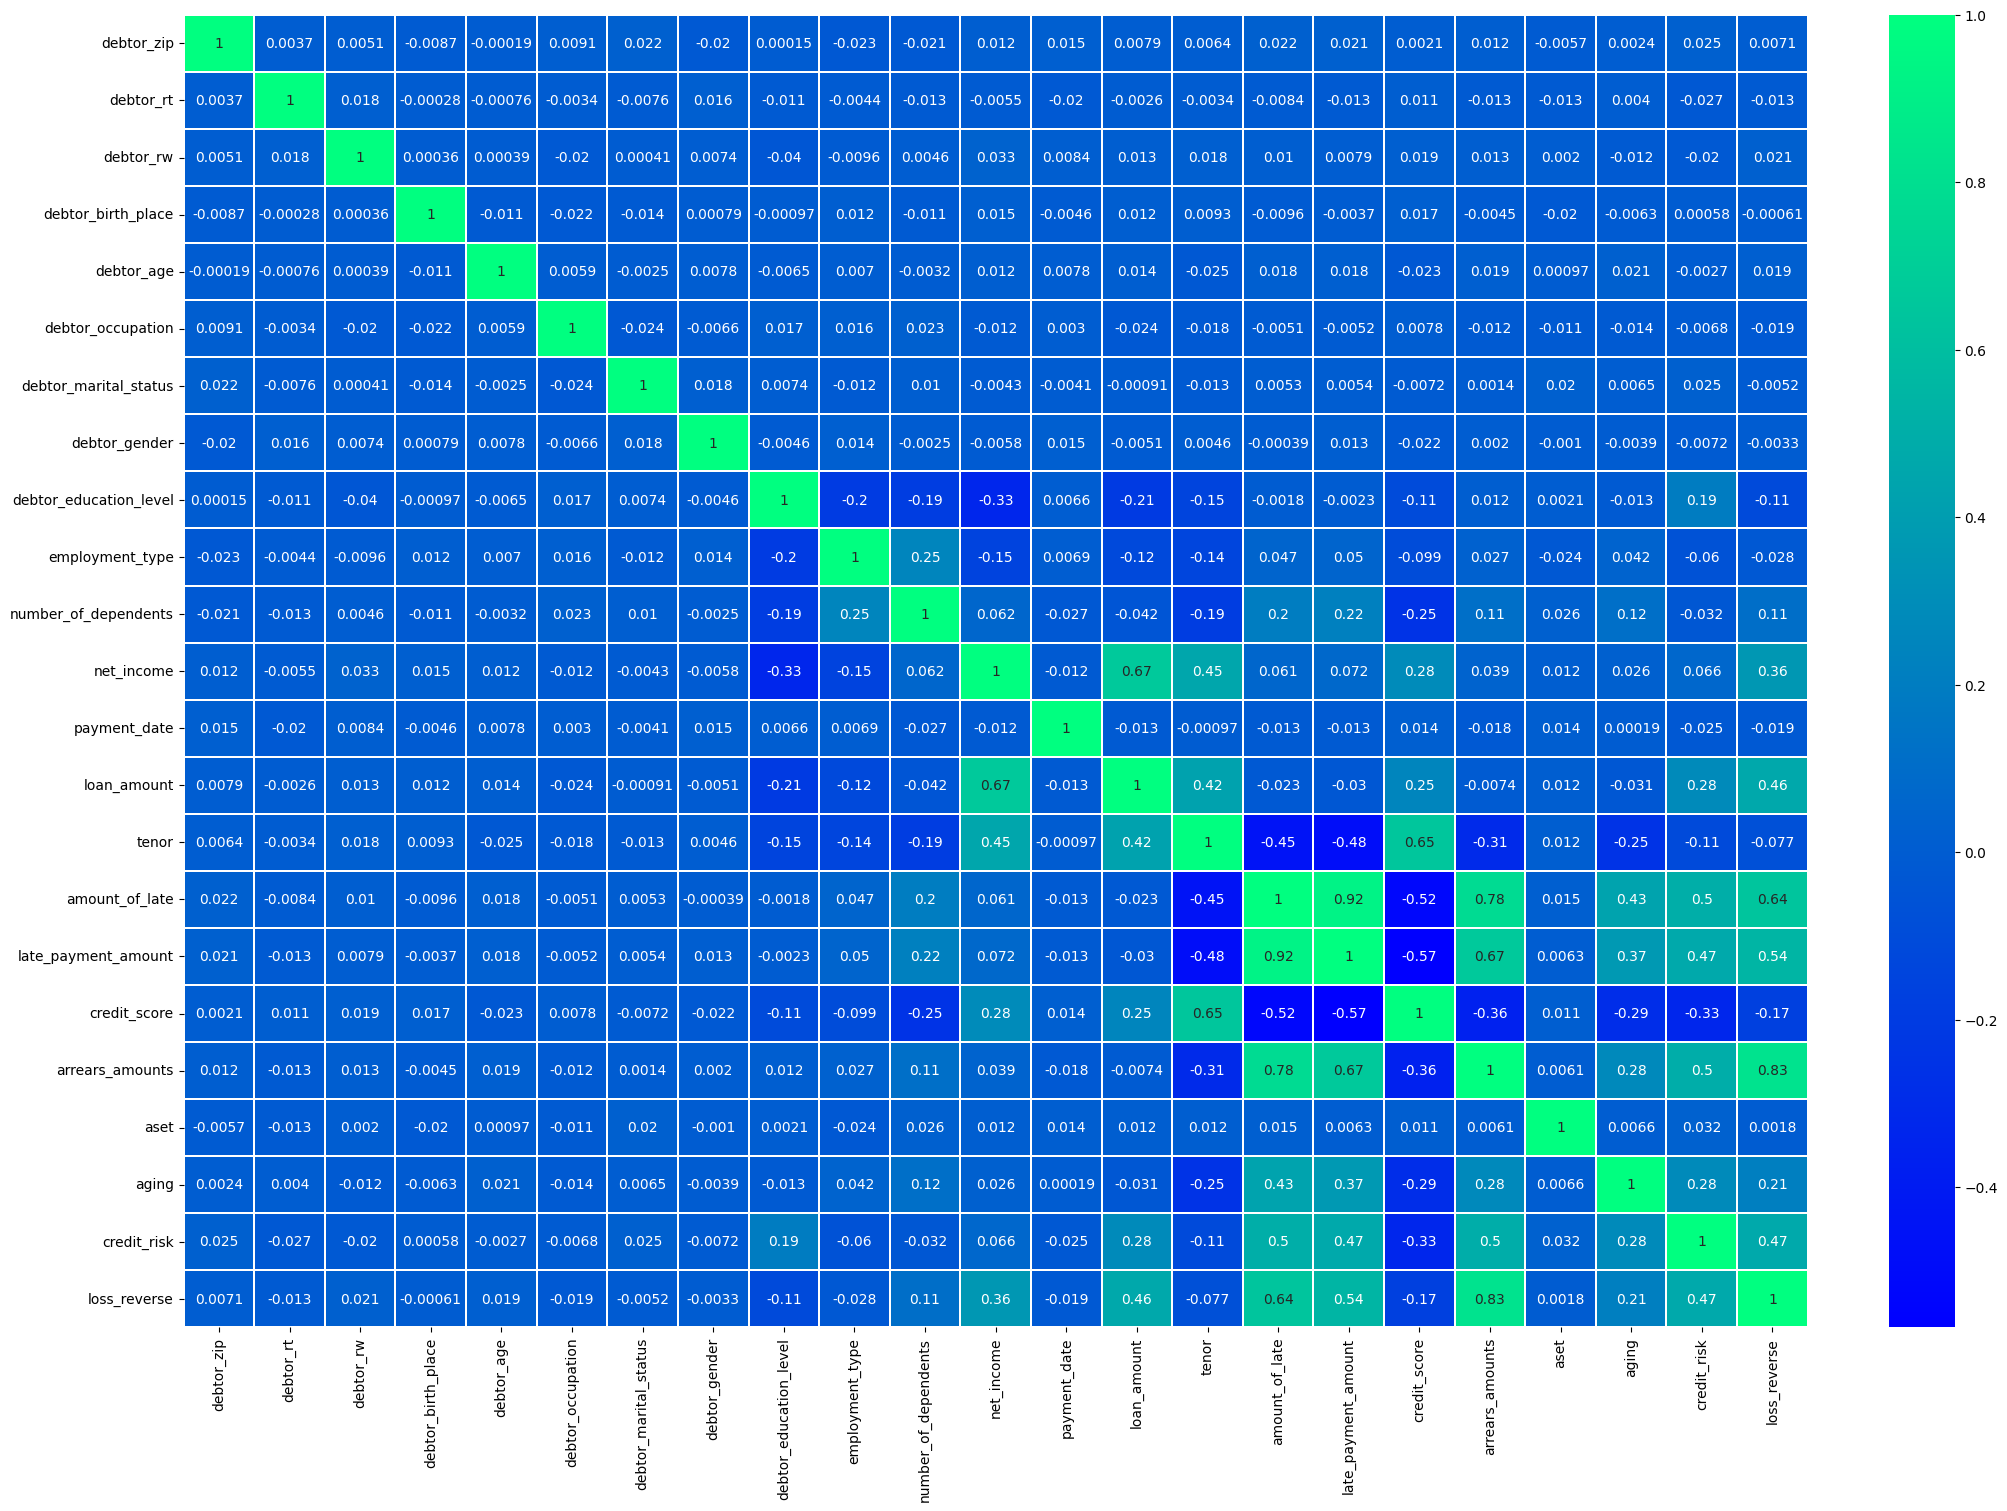

In [18]:
fig, ax = plt.subplots(figsize=(20, 15), layout="constrained")
sns.heatmap(data=df_nasabah.corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)
plt.show()

In [19]:
for i in columns:
    df_nasabah[i] = columns[i].inverse_transform(df_nasabah[i])

df_nasabah.head(5)

,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,debtor_gender,debtor_education_level,employment_type,...,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,aging,credit_risk,loss_reverse
0,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,perempuan,D3,Retired,...,62500000,21,2,1,670,0,11000000,DPK,Tertagih dengan resiko rendah,0
1,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,laki-laki,D3,Full-time,...,70833333,18,31,3,402,1,17000000,DPK,Tertagih dengan resiko rendah,17708333
2,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,laki-laki,D2,Full-time,...,59333333,17,0,0,505,0,14500000,Lancar,Tertagih dengan resiko rendah,0
3,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,laki-laki,D2,Retired,...,61166667,17,64,5,508,1,11500000,DPK,Tertagih dengan resiko rendah,15291667
4,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,laki-laki,SMA,Contract,...,56166667,15,14,2,371,0,5500000,DPK,Tertagih dengan resiko rendah,0


In [20]:
df_nasabah.to_csv("nasabah_clean.csv")